# Home Work 2
## Farahi Zubair

In [421]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
from IPython import display
import matplotlib.image as mpimg
from PIL import Image
from IPython.display import display, Image


# Box filter and Gaussian blur filter

In [359]:
def convolution(img, kernel):
    h, w = img.shape[0:2]
    if len(img.shape) > 2:
        channel = 3
    else:
        channel = 1
    kernel_size = kernel.shape[0]
    if channel == 3:
        kernel = np.stack([kernel for i in range(3)], axis=2)
    new_height = h - kernel_size + 1
    new_width = w - kernel_size + 1
    if channel == 3:
        output = np.zeros((new_height, new_width, channel))
    else:
        output = np.zeros((new_height, new_width))
    for i in range(new_height):
        for j in range(new_width):
            output[i, j] = np.sum(img[i:i+kernel_size,j:j+kernel_size] * kernel,axis=(0,1))
    return output



In [364]:
def gaussianBlur(kernel_size, sigma=1.0):
    output = np.zeros((kernel_size, kernel_size), np.float32)
    c = kernel_size // 2
    for i in range(kernel_size):
        for j in range(kernel_size):
            output[i, j] =  (np.exp(- ((i-c)**2 + (j-c)**2) / (2 * sigma**2) )) / (2 * np.pi * (sigma**2))

    return output
    

In [365]:
def gaussian_blur(image, kernel_size):
    kernel = gaussianBlur(kernel_size, 1.0)
    return convolution(image, kernel)


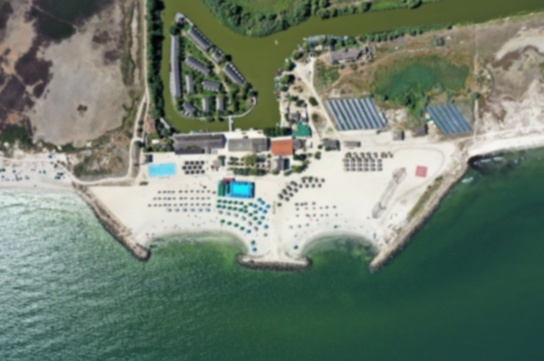

In [366]:
image = cv2.imread('Gura_Portitei_Scara_010.jpg')
newImage = gaussian_blur(image,5)
cv2.imwrite('Gura_Portitei_Scara_Gaussian_filterd.jpg',newImage)
display.Image('Gura_Portitei_Scara_Gaussian_filterd.jpg')

In [355]:
def box_blur(kernel_size):
    return np.full((kernel_size, kernel_size), 1./(kernel_size * kernel_size))


### box filter with kernel size 3 and 5

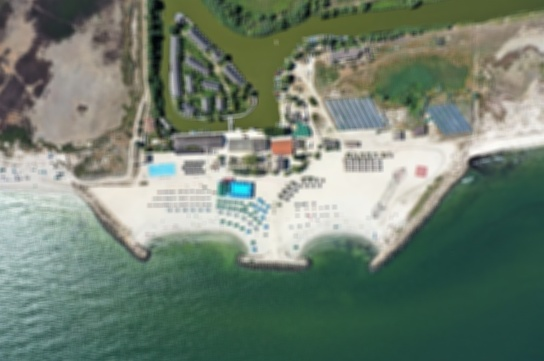

In [369]:
image = cv2.imread('Gura_Portitei_Scara_010.jpg')
newImage = convolution(image, box_blur(5))
cv2.imwrite('Gura_Portitei_Scara_Box_5.jpg',newImage)
display.Image('Gura_Portitei_Scara_Box_5.jpg')

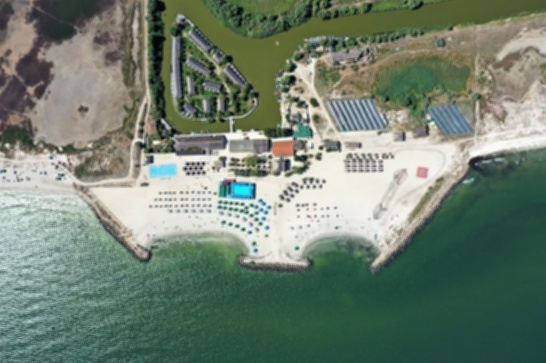

In [370]:
image = cv2.imread('Gura_Portitei_Scara_010.jpg')
newImage = convolution(image, box_blur(3))
cv2.imwrite('Gura_Portitei_Scara_Box_3.jpg',newImage)
display.Image('Gura_Portitei_Scara_Box_3.jpg')

# Edge detection filter

In [407]:
def sobel_filter(image_array):
    sobel_filter_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_filter_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    Gx = convolution(image_array, sobel_filter_x)
    Gy = convolution(image_array, sobel_filter_y)
    G = np.sqrt(np.add(np.multiply(Gx, Gx), np.multiply(Gy, Gy)))
    G_img = Image.fromarray(G)
    G_img = G_img.convert("L")
    G_img.save("G.jpg")
    Gy_img = Image.fromarray(Gy)
    Gy_img = Gy_img.convert("L")
    Gy_img.save("Gy.jpg")
    Gx_img = Image.fromarray(Gx)
    Gx_img = Gx_img.convert("L")
    Gx_img.save("Gx.jpg")
    return G

In [408]:
def rgb2grayscale(image_array):
    return np.dot( image_array[...,:3], [0.2989, 0.5870, 0.1140] )

In [409]:
image = Image.open('Gura_Portitei_Scara_010.jpg')
image_np = np.asarray(image).copy()
image_np = rgb2grayscale(image_np)
image_edges = sobel_filter(image_np)
Image.fromarray(image_edges.astype(np.uint8)).save("sobel_edges.jpg")

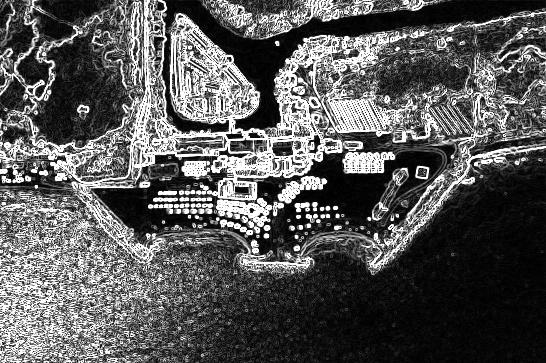

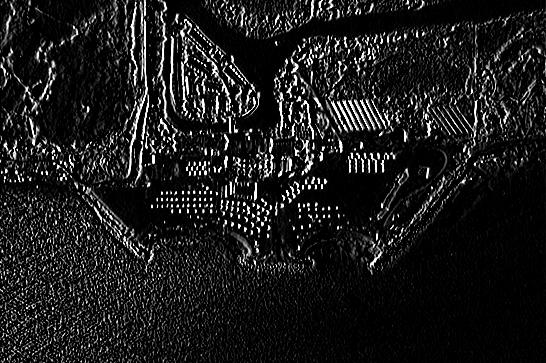

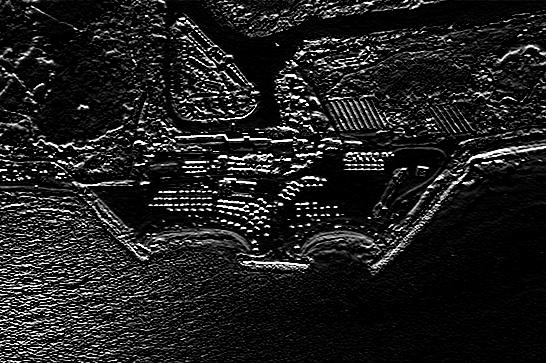

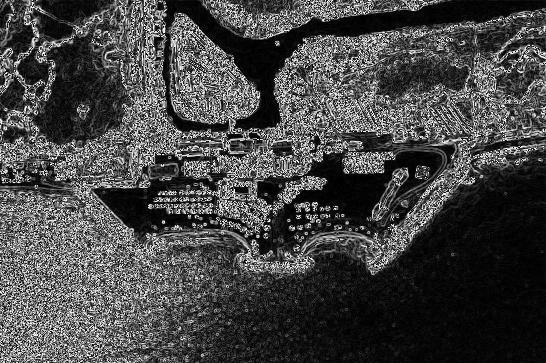

In [422]:
G = "G.jpg"
Gx = "Gx.jpg"
Gy = "Gy.jpg"
sobel_edges = "sobel_edges.jpg"
for path in G, Gx, Gy, sobel_edges:
    img = Image(path)
    display(img)